In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

### Calinski-Harabaz指数

对于聚类模型来说，我们希望聚类结果为相同类别之间的数据距离越近越好，而不同类别之间的数据距离越远越好；因此，对于$k$个聚类，Calinski-Harabaz的分数$s$被定义为组间离散与组内离散的比率，该分值越大说明聚类效果越好。
Calinski-Harbasz Score是通过评估类之间方差和类内方差来计算得分。
$$s=\frac{SS_B}{k-1}/\frac{SS_W}{N-k}$$
其中$k$代表聚类类别数，$N$代表全部数据数目。 $SS_B$是类间方差，$SS_W$是类内方差。

$SS_B$的计算方式是：
$$SS_B=tr(B_k)$$
$$B_k=\sum\limits_{q=1}^k n_q(C_q-c_E)(C_q-c_E)^T$$

$SS_w$的计算方式是：
$$SS_W=tr(W_k)$$
$$W_k=\sum\limits_{q=1}^k \sum\limits_{x\in c_q}(x-C_q)(x-C_q)^T$$

其中$C_q$是类$q$的中心点，$c_q$是类$q$的数据集合，$c_E$是所有数据的中心点，$n_q$是类$q$数据点的总数。


还有其他很多的聚类模型评估方法，例如**轮廓系数、兰德指数、互信息**等。

### 生成数据

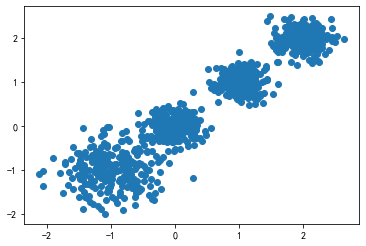

In [29]:
from sklearn.datasets import make_blobs
# X为样本特征，Y为样本簇类别，共1000个样本，每个样本2个特征，对应x和y轴，共4个簇，
# 簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2], random_state=9)
plt.scatter(X[:, 0], X[:, 1], marker='o')  # 假设暂不知道y类别，不设置c=y，使用kmeans聚类
plt.show()

### K=2聚类结果

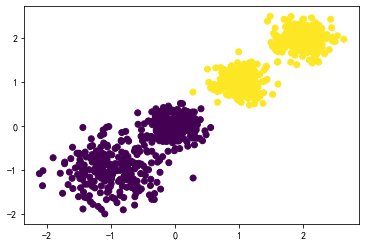

In [30]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

用Calinski-Harabasz Index评估的聚类分数

In [5]:
from sklearn import metrics
print(metrics.calinski_harabasz_score(X, y_pred))

3116.1706763322227


### K=3聚类结果

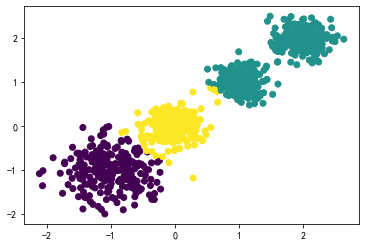

In [6]:
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [7]:
print(metrics.calinski_harabasz_score(X, y_pred))

2931.6250301995556


### K=4聚类结果

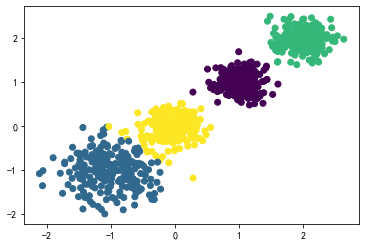

In [15]:
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [16]:
print(metrics.calinski_harabasz_score(X, y_pred))

5924.050613480169


### 文本聚类

In [4]:
from sklearn.feature_extraction.text import CountVectorizer  # 从sklearn.feature_extraction.text里导入文本特征向量化模块
from sklearn.feature_extraction.text import TfidfVectorizer  
import os
import jieba
f_stopwords = open("stopwords.txt",encoding="utf-8")
stop_words = [line.strip() for line in f_stopwords] + ['','\ufeff','©','_','—','【','】',')','(','、','，','“','”','。','\n','《','》',' ','-','！','？','.','\'','[',']','：','/','.','"','\u3000','’','．',',','…','?']

corpus_path = "搜狗文本分类语料库迷你版"
classes = os.listdir(corpus_path)
data_list = []
for cla in classes:
    for file in os.listdir(os.path.join(corpus_path,cla)):
        news = os.path.join(corpus_path,cla,file)
        content = open(news,encoding="utf-8").read()
        data_list.append(" ".join([word for word in jieba.lcut(content) if word not in stop_words]))

In [5]:
# #文本特征向量化，词频作为特征
# vec = CountVectorizer()
# # X 是稀疏矩阵，类型为scipy.sparse.csr.csr_matrix
# X = vec.fit_transform(data_list) 

# tfidf文本特征向量化
tfidf = TfidfVectorizer(max_df=0.5, max_features=100000)
X = tfidf.fit_transform(data_list)

In [8]:
len(tfidf.vocabulary_)

100000

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=9)
y_pred = kmeans.fit_predict(X)

### 输出每个簇的数据个数

In [27]:
for i in range(5):
    print("Cluster %d:" % i, end='')
    print(len(kmeans.labels_[kmeans.labels_==i]))

Cluster 0:685
Cluster 1:660
Cluster 2:100
Cluster 3:744
Cluster 4:2811


### 中心点的特征

In [28]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i, end='') 
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end='')
    print("\n")

Cluster 0: 考生 学生 专业 考试 招生 孩子 学校 教育 高考 志愿 录取 高校 家长 大学 学习 报名 报考 教师 老师 复习

Cluster 1: 汽车 市场 车型 品牌 企业 中国 自主 奇瑞 销售 价格 轿车 产品 发动机 消费者 上市 万元 创新 销量 之子 万辆

Cluster 2: nbsp gt 男人 维生素 食物 女人 食用 蔬菜 含有 幸福 菠萝 注意 健康 不会 500 小编 不要 治疗 轮胎 营养

Cluster 3: 比赛 新华社 中国队 冠军 决赛 战胜 尤伯杯 队员 选手 东京 当日 主场 照片 联赛 2006 球队 分钟 球员 体育 对手

Cluster 4: 美国 中国 进行 导弹 工作 军事 公司 日本 系统 作战 治疗 问题 nbsp 医院 美军 部队 训练 没有 飞机 gt

